#### PROBLEM STATEMENT
##### Financial institutions are required to respond to consumer complaints in a timely and effective manner to comply with regulatory standards set by the Consumer Financial Protection Bureau (CFPB).
##### The objective of this project is to analyze consumer financial complaints data to:
##### 1. Monitor complaint volume and trends over time
##### 2. Evaluate company responsiveness and resolution quality
##### 3. Identify high-risk financial products and issue types
#### The insights from this analysis can help financial institutions and fintech companies improve operational performance, reduce regulatory risk, and enhance customer experience.

#### This notebook answers many business questions and create the KPI tables which would be exported to Power BI to build the dashboards which would be helpful in monitoring the complaints and responses.

In [198]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns

# Ignoring harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [199]:
# Importing the cleaned dataset for analysis, defining KPIs, and visualizations
df = pd.read_csv('../data/processed/cleaned_data.csv')
df.head()

,product,subproduct,issue,company_name,state,company_response_to_consumer,timely_response,month_and_year,year_received
0,Debt collection,Other debt,Attempts to collect debt not owed,ERC,IA,Closed with explanation,True,2021-03,2021
1,Debt collection,Other debt,Attempts to collect debt not owed,ERC,CA,Closed with explanation,True,2019-12,2019
2,Debt collection,Credit card debt,Attempts to collect debt not owed,ERC,NY,Closed with explanation,True,2021-03,2021
3,Debt collection,I do not know,Attempts to collect debt not owed,ERC,NY,Closed with explanation,True,2021-08,2021
4,Debt collection,Other debt,Attempts to collect debt not owed,ERC,PA,Closed with explanation,True,2019-11,2019


#### ANSWERING TO THE BUSINESS QUESTIONS USING THE ABOVE DATASET

##### 1. How many complaints have been received by CFPB in total?

In [200]:
total_complaints = df.shape[0]
total_complaints

1431388

In [201]:
# A total of 14,31,338 complaints have been received by CFPB.

##### 2. How has the total number of consumer complaints changed over time?

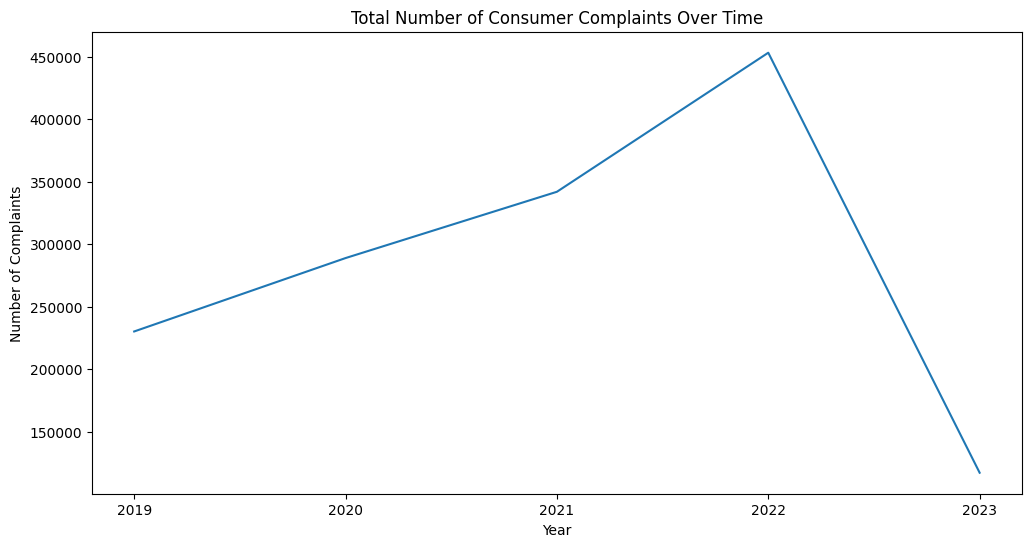

In [202]:
complaints_over_time = df["year_received"].value_counts().sort_index()
ax = complaints_over_time.plot(kind='line', figsize=(12,6))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('Total Number of Consumer Complaints Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Complaints')
plt.show()

In [203]:
df["month_and_year"].max()

'2023-03'

In [204]:
complaints_over_time = complaints_over_time.reset_index().rename(columns={"count":"number_of_complaints"})
complaints_over_time

,year_received,number_of_complaints
0,2019,230218
1,2020,288905
2,2021,341901
3,2022,453080
4,2023,117284


In [205]:
# Complaints increased steadily from 2019–2022. The dataset has complaints registered up to March 2023.
# The decline in 2023 is likely due to partial-year data
# and should not be interpreted as an improvement in consumer satisfaction without further validation.

##### 3. Which financial products receive the highest number of complaints?

In [206]:
complaints_by_product = df["product"].value_counts().reset_index().rename(columns={"count": "number_of_complaints"})
complaints_by_product

,product,number_of_complaints
0,"Credit reporting, credit repair services, or o...",721366
1,Debt collection,233620
2,Credit card or prepaid card,138077
3,Checking or savings account,120775
4,Mortgage,100497
5,"Money transfer, virtual currency, or money ser...",40948
6,Vehicle loan or lease,31735
7,Student loan,24513
8,"Payday loan, title loan, or personal loan",19857


In [207]:
# The highest number of complaints are received for the financial product/service "Credit reporting, 
# credit repair services, or other personal consumer reports". So, that is a high-risk financial product/service.

##### 4. Which products show the fastest growth in complaints over time?

In [208]:
complaints_growth_per_product = df.groupby("product")["year_received"].value_counts().unstack()
complaints_growth_per_product

year_received,2019,2020,2021,2022,2023
product,,,,,
Checking or savings account,21396,23699,28790,36655,10235
Credit card or prepaid card,25384,33018,31075,38966,9634
"Credit reporting, credit repair services, or other personal consumer reports",94336,133810,160696,261798,70726
Debt collection,45074,50691,67114,57650,13091
"Money transfer, virtual currency, or money service",5012,8086,12110,13096,2644
Mortgage,22131,24112,26000,22874,5380
"Payday loan, title loan, or personal loan",4291,4191,4293,5744,1338
Student loan,7118,4351,4074,7710,1260
Vehicle loan or lease,5476,6947,7749,8587,2976


In [209]:
# Insights from the above table:
# 1. The consumer complaints against all of the products/services has been declined sharply in 2023, which may be due
# to partial-year data. The exact reason needs to be investigated further.
# 2. For many products/services, the complaints show a steady increase from 2019 to 2022. 
# 3. The product/service "Credit reporting, credit repair services, or other personal consumer reports" has shown a
# sharp increase in the number of complaints from 2019 to 2022.

##### 5. Which products have the lowest timely response rates?

In [210]:
# There are two values in the 'timely_response' column: True and False. 
# 'True' indicates that the company responded to the complaint in a timely manner, 
# while 'False' indicates that they did not.
# The product which has the lowest timely_response rate is the one which has the lowest percentage of 'True' values.
(df.groupby("product")["timely_response"].value_counts(normalize=True).unstack() * 100).sort_values(by=True, ascending = False)

timely_response,False,True
product,,
"Credit reporting, credit repair services, or other personal consumer reports",0.633243,99.366757
Credit card or prepaid card,1.448467,98.551533
Checking or savings account,1.512730,98.487270
Mortgage,1.671692,98.328308
Vehicle loan or lease,1.922168,98.077832
"Money transfer, virtual currency, or money service",2.105109,97.894891
Student loan,2.166198,97.833802
Debt collection,3.343464,96.656536
"Payday loan, title loan, or personal loan",4.900035,95.099965


In [211]:
# From the above table, it is observed that the product "Payday loan, title loan, or personal loan" 
# has the lowest timely response rate.

##### 6. Which companies receive the most complaints?

In [212]:
df["company_name"].value_counts().head(10)

company_name
Experian Information Solutions Inc.       190289
EQUIFAX, INC.                             185368
TRANSUNION INTERMEDIATE HOLDINGS, INC.    177937
CAPITAL ONE FINANCIAL CORPORATION          44182
BANK OF AMERICA, NATIONAL ASSOCIATION      42569
JPMORGAN CHASE & CO.                       41288
WELLS FARGO & COMPANY                      40362
CITIBANK, N.A.                             34290
SYNCHRONY FINANCIAL                        21392
Bread Financial Holdings, Inc.             15936
Name: count, dtype: int64

In [213]:
# The company "Experian Information Solutions Inc." has received the highest number of complaints.

##### 7. How do companies differ in their response quality?

In [214]:
# Creating a DataFrame to analyze the timely response rates of companies to the complaints received:
responses_df = df.groupby("company_name")["timely_response"].value_counts().reset_index().sort_values(by="count", ascending=False)

# Adding a column to the table "responses_df"for total complaints per company:
total_complaints = df["company_name"].value_counts().reset_index()

# Merging the above two dataframes:
responses_df = responses_df.merge(total_complaints, on = "company_name", how = "left")

# Renaming the columns for better understanding:
responses_df.rename(columns={"count_x": "count", "count_y": "total_complaints"}, inplace=True)
responses_df

,company_name,timely_response,count,total_complaints
0,Experian Information Solutions Inc.,True,190267,190289
1,"EQUIFAX, INC.",True,185195,185368
2,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",True,177769,177937
3,CAPITAL ONE FINANCIAL CORPORATION,True,44167,44182
4,JPMORGAN CHASE & CO.,True,41288,41288
...,...,...,...,...
6717,"iReverse Home Loans, Corporation",True,1,1
6718,"iMove Mortgage, LLC",True,1,1
6719,iHome Financial Inc.,True,1,1
6720,"i3 Lending, Inc",True,1,2


In [215]:
# Filtering the above dataframe where timely_response is True to find companies with the highest timely responses:
positive_response = responses_df[responses_df["timely_response"] == True]

# Finding the response rate for each company
positive_response["response_rate"] = (positive_response["count"] / positive_response["total_complaints"]) * 100
positive_response.sort_values(by="response_rate", ascending=False).head(50)

,company_name,timely_response,count,total_complaints,response_rate
4,JPMORGAN CHASE & CO.,True,41288,41288,100.0
6719,iHome Financial Inc.,True,1,1,100.0
8,SYNCHRONY FINANCIAL,True,21392,21392,100.0
6686,"AIV FINANCIAL GROUP, LLC",True,1,1,100.0
6683,X5 Home Loans LLC,True,1,1,100.0
6682,XANDER MORTGAGE & REAL ESTATE INC,True,1,1,100.0
6708,Premier Auto Finance of South Florida,True,1,1,100.0
6710,"Preferred Capital Funding of Illinois, LLC",True,1,1,100.0
6711,"Predian Financial Services, LLC",True,1,1,100.0
6712,"Precise Financial Group, LLC",True,1,1,100.0


In [216]:
# The above table shows the top 50 companies with the highest timely response rates to consumer complaints. 
# Most of these companies have received a very few complaints, which may contribute to their high response rates.
# These companies have demonstrated a strong commitment to functioning propoerly and
# addressing consumer issues promptly. Response rates should be interpreted alongside complaint volume, 
# as low-volume companies may show inflated performance metrics.

In [217]:
# Checking the companies which have low response rates:
positive_response.sort_values(by="response_rate", ascending=False).tail(50)

,company_name,timely_response,count,total_complaints,response_rate
4705,Account Brokers Inc.,True,2,8,25.000000
3452,Universal Payment Corporation,True,4,16,25.000000
5262,Man-Data Inc.,True,1,4,25.000000
5260,"MUSA Holdings, LLC",True,1,4,25.000000
3052,"Executive Credit Management, Inc",True,5,20,25.000000
5393,"Larsen & Associates, P.L.",True,1,4,25.000000
643,"AmerAssist A/R Solutions, Inc.",True,99,404,24.504950
980,"FIDELITY CAPITAL HOLDINGS, INC",True,50,207,24.154589
3132,"Results Unlimited, Inc.",True,5,21,23.809524
3688,Summit Horizon Financial Services,True,3,13,23.076923


In [218]:
# The above table shows 50 companies with the lowest timely response rates to consumer complaints. The highest response
# rate among these companies is 25%. These companies have shown a lack of responsiveness to consumer complaints, which may indicate
# poor customer service or operational inefficiencies.

In [219]:
df.head()

,product,subproduct,issue,company_name,state,company_response_to_consumer,timely_response,month_and_year,year_received
0,Debt collection,Other debt,Attempts to collect debt not owed,ERC,IA,Closed with explanation,True,2021-03,2021
1,Debt collection,Other debt,Attempts to collect debt not owed,ERC,CA,Closed with explanation,True,2019-12,2019
2,Debt collection,Credit card debt,Attempts to collect debt not owed,ERC,NY,Closed with explanation,True,2021-03,2021
3,Debt collection,I do not know,Attempts to collect debt not owed,ERC,NY,Closed with explanation,True,2021-08,2021
4,Debt collection,Other debt,Attempts to collect debt not owed,ERC,PA,Closed with explanation,True,2019-11,2019


##### 8. Which companies have higher untimely response rates?

In [220]:
# Filtering the companies which have untimely responses:
untimely_response = df[df["company_response_to_consumer"] == "Untimely response"]
untimely_response

,product,subproduct,issue,company_name,state,company_response_to_consumer,timely_response,month_and_year,year_received
188,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,"HOVG, LLC",AZ,Untimely response,False,2022-07,2022
999,Debt collection,I do not know,Threatened to contact someone or share informa...,Earm LLC,PA,Untimely response,False,2021-03,2021
1143,Debt collection,Medical debt,Attempts to collect debt not owed,ALCHRO INC.,FL,Untimely response,False,2019-04,2019
1145,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,"BOGMAN, INC",VA,Untimely response,False,2020-12,2020
1824,Debt collection,Other debt,Attempts to collect debt not owed,AT&T,WA,Untimely response,False,2021-03,2021
...,...,...,...,...,...,...,...,...,...
1428999,Debt collection,Other debt,Took or threatened to take negative or legal a...,NAM National Arbitration and Mediation,DC,Untimely response,False,2019-02,2019
1429432,Debt collection,I do not know,Attempts to collect debt not owed,Law Office of Regent and Associates,CA,Untimely response,False,2022-03,2022
1429447,Mortgage,Other type of mortgage,Applying for a mortgage or refinancing an exis...,"SOUTHPOINT FINANCIAL SERVICES, INC.",VA,Untimely response,False,2021-01,2021
1429722,Checking or savings account,Checking account,Managing an account,"BANK OF AMERICA, NATIONAL ASSOCIATION",CA,Untimely response,False,2022-12,2022


In [221]:
# Finding the number of untimely responses by each company:
untimely_response_df = untimely_response["company_name"].value_counts().reset_index().rename(columns = {"count": "untimely_response_count"})
untimely_response_df

,company_name,untimely_response_count
0,"BANK OF AMERICA, NATIONAL ASSOCIATION",224
1,"Mobiloans, LLC",188
2,Premier Student Loan Center,98
3,Ameritech Financial,67
4,Sezzle Inc.,67
...,...,...
926,Consumer Collection Advocates,1
927,"Bayside Capital Services, LLC",1
928,Zenith Financial Network Inc,1
929,Seth L. Goldner PC,1


In [222]:
# Finding the total responses given by each company:
responses = df["company_name"].value_counts().reset_index().rename(columns = {"count": "total_responses"})
responses

,company_name,total_responses
0,Experian Information Solutions Inc.,190289
1,"EQUIFAX, INC.",185368
2,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",177937
3,CAPITAL ONE FINANCIAL CORPORATION,44182
4,"BANK OF AMERICA, NATIONAL ASSOCIATION",42569
...,...,...
5241,"1ST CHOICE LOANS, LLC.",1
5242,McMichael Taylor Gray LLC,1
5243,"Invicta Mortgage Group, Inc.",1
5244,"Trevathan Law Firm, APLC",1


In [223]:
# Merging the untimely_response_df with responses to calculate the untimely response rate:
untimely_response_merged = untimely_response_df.merge(responses, on="company_name", how="left")

# Calculating the untimely response rate for each company:
untimely_response_merged["untimely_response_rate"] = (untimely_response_merged["untimely_response_count"] / untimely_response_merged["total_responses"]) * 100
untimely_response_merged.sort_values(by="untimely_response_rate", ascending=False).head(50)

,company_name,untimely_response_count,total_responses,untimely_response_rate
929,Seth L. Goldner PC,1,1,100.0
912,Five Lakes Agency,1,1,100.0
911,Point Boosters,1,1,100.0
909,"JBS Finance, Inc.",1,1,100.0
908,Jefferson Title Corporation,1,1,100.0
906,Clayton Holdings LLC,1,1,100.0
905,Audubon Holdings Group,1,1,100.0
904,AT&T,1,1,100.0
903,"IMPERIAL CREDIT SYSTEMS, INC.",1,1,100.0
902,"Absolute Mortgage Company, Inc.",1,1,100.0


In [224]:
# The above table shows the top 50 companies with the highest untimely response rates to consumer complaints. 
# The untimely response rate for these companies is 100%, indicating that they have not responded to any consumer complaints in a timely manner.
# This shows a significant lack of responsiveness and may reflect poorly on their customer service practices.
# High untimely response rates are often observed among companies with very low complaint volumes,
# and should be interpreted cautiously.

##### 9. What percentage of complaints are resolved with monetary relief?

In [225]:
df["company_response_to_consumer"].unique()

array(['Closed with explanation', 'In progress',
       'Closed with monetary relief', 'Closed with non-monetary relief',
       'Untimely response'], dtype=object)

In [226]:
# Finding the percentage of complaints that were "Closed with monetary relief":
closed_with_monetary_relief_percentage = (df[df["company_response_to_consumer"] == "Closed with monetary relief"].shape[0] / df.shape[0]) * 100
closed_with_monetary_relief_percentage

4.021551109831856

In [227]:
# Out of the total complaints received, only 4.02% were "Closed with monetary relief". 
# Monetary relief is relatively rare, suggesting that most complaints are resolved through explanations or non-monetary actions.

##### 10. What percentage of complaints are resolved with just explanation and what percentage have got untimely responses?

In [228]:
# Finding the percentage of complaints that were "Closed with explanation" and those that were "Untimely_response":
closed_with_explanation_percentage = (df[df["company_response_to_consumer"] == "Closed with explanation"].shape[0] / df.shape[0]) * 100
print(f"Percentage of complaints 'Closed with explanation': {closed_with_explanation_percentage:.2f}%")
untimely_response_percentage = (df[df["company_response_to_consumer"] == "Untimely response"].shape[0] / df.shape[0]) * 100
print(f"Percentage of complaints 'Untimely response': {untimely_response_percentage:.2f}%")

Percentage of complaints 'Closed with explanation': 78.09%
Percentage of complaints 'Untimely response': 0.31%


In [229]:
# The above analysis clearly shows that most of the complaints are just closed with explanations.

##### 11. Which states report the highest complaint volumes?

In [230]:
# Complaints proportion by state (top 20 states):
complaints_by_state = (df["state"].value_counts(normalize=True) * 100).reset_index().head(20)
complaints_by_state

,state,proportion
0,CA,11.921366
1,FL,9.044159
2,TX,8.409809
3,NY,6.204537
4,GA,6.090941
5,PA,4.092741
6,IL,3.966220
7,NJ,3.540340
8,NC,3.346891
9,OH,3.007431


In [231]:
# The above table shows the top 20 states with the highest percentage of consumer complaints. 
# Out of those states, the first six states have complaints percentage greater than 4%.

##### 12. Which is the most common consumer issue/complaint?

In [232]:
issues_count = df["issue"].value_counts().reset_index()
issues_count.rename(columns = {"count": "no_of_complaints"}, inplace = True)
issues_count

,issue,no_of_complaints
0,Incorrect information on your report,345942
1,Problem with a credit reporting company's inve...,214209
2,Improper use of your report,145030
3,Attempts to collect debt not owed,121096
4,Managing an account,74487
...,...,...
76,"Was approved for a loan, but didn't receive money",41
77,Problem with credit report or credit score,34
78,Problem with an overdraft,8
79,Property was sold,4


In [233]:
# The above table shows that the most common issues reported by the customers are related to "Incorrect information on your report", 
# "Problem with a credit reporting company's investigation into an existing problem", and "Improper use of your report".
# The issue "Incorrect information on your report" is the most frequently reported problem among consumers.
# The "report" here refers to credit reports maintained by credit bureaus.. 
# Incorrect information in credit reports could mean incorrect information about loans taken, payment history, credit cards,
# etc., which can adversely affect a consumer's credit score and financial health.

#### DEFINING THE KEY KPI TABLES

In [234]:
# Two KPI tables been created earlier are complaints_over_time, complaints_by_product, issues_count, and complaints_by_state..
# Next KPI table to be created is timely_response_rate_by_product, which shows the timely response rates for each product/service.
timely_response_rate_by_product = (df.groupby("product")["timely_response"].value_counts(normalize=True).unstack() * 100).reset_index()
timely_response_rate_by_product.rename(columns={True: "timely_response_rate", False: "untimely_response_rate"}, inplace=True)
timely_response_rate_by_product

timely_response,product,untimely_response_rate,timely_response_rate
0,Checking or savings account,1.512730,98.487270
1,Credit card or prepaid card,1.448467,98.551533
2,"Credit reporting, credit repair services, or o...",0.633243,99.366757
3,Debt collection,3.343464,96.656536
4,"Money transfer, virtual currency, or money ser...",2.105109,97.894891
5,Mortgage,1.671692,98.328308
6,"Payday loan, title loan, or personal loan",4.900035,95.099965
7,Student loan,2.166198,97.833802
8,Vehicle loan or lease,1.922168,98.077832


In [235]:
# Complaint outcome distribution to analyze how complaints are resolved:
complaint_outcome_distribution = (df["company_response_to_consumer"].value_counts(normalize=True) * 100).reset_index()
complaint_outcome_distribution

,company_response_to_consumer,proportion
0,Closed with explanation,78.093221
1,Closed with non-monetary relief,15.186099
2,Closed with monetary relief,4.021551
3,In progress,2.391874
4,Untimely response,0.307254


In [236]:
# Creating a KPI table for complaints_per_company to show the top 10 companies with the highest number of complaints:
complaints_per_company = df["company_name"].value_counts().head(10).reset_index()
complaints_per_company.rename(columns = {"count": "no_of_complaints"}, inplace = True)
complaints_per_company

,company_name,no_of_complaints
0,Experian Information Solutions Inc.,190289
1,"EQUIFAX, INC.",185368
2,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",177937
3,CAPITAL ONE FINANCIAL CORPORATION,44182
4,"BANK OF AMERICA, NATIONAL ASSOCIATION",42569
5,JPMORGAN CHASE & CO.,41288
6,WELLS FARGO & COMPANY,40362
7,"CITIBANK, N.A.",34290
8,SYNCHRONY FINANCIAL,21392
9,"Bread Financial Holdings, Inc.",15936


#### Grouping companies by their response rates:
##### Each company has its own timely response rates to the complaints they receive. Some respond quickly, some respond very late. We have to find the number of companies that respond quickly and those which respond late.

In [237]:
# The positive_response DataFrame already contains the response rates for companies with timely responses.
positive_response

,company_name,timely_response,count,total_complaints,response_rate
0,Experian Information Solutions Inc.,True,190267,190289,99.988439
1,"EQUIFAX, INC.",True,185195,185368,99.906672
2,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",True,177769,177937,99.905585
3,CAPITAL ONE FINANCIAL CORPORATION,True,44167,44182,99.966050
4,JPMORGAN CHASE & CO.,True,41288,41288,100.000000
...,...,...,...,...,...
6716,snw investments,True,1,1,100.000000
6717,"iReverse Home Loans, Corporation",True,1,1,100.000000
6718,"iMove Mortgage, LLC",True,1,1,100.000000
6719,iHome Financial Inc.,True,1,1,100.000000


In [238]:
# Defining a function to categorize response rates into performance buckets

def response_rate(response_rate):
    if response_rate >= 90:
        return "Fair response rate"
    elif 70 <= response_rate < 90:
        return "Good response rate"
    elif 50 <= response_rate < 70:
        return "Average response rate"
    elif 25 <= response_rate < 50:
        return "Poor response rate"
    elif response_rate < 25:
        return "Very poor response rate"

In [239]:
# Applying the function to create a new column 'response_rate_category'
positive_response['response_rate_category'] = positive_response['response_rate'].apply(response_rate)
positive_response.rename(columns = {"response_rate_category": "performance_bucket"}, inplace = True)
positive_response

,company_name,timely_response,count,total_complaints,response_rate,performance_bucket
0,Experian Information Solutions Inc.,True,190267,190289,99.988439,Fair response rate
1,"EQUIFAX, INC.",True,185195,185368,99.906672,Fair response rate
2,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",True,177769,177937,99.905585,Fair response rate
3,CAPITAL ONE FINANCIAL CORPORATION,True,44167,44182,99.966050,Fair response rate
4,JPMORGAN CHASE & CO.,True,41288,41288,100.000000,Fair response rate
...,...,...,...,...,...,...
6716,snw investments,True,1,1,100.000000,Fair response rate
6717,"iReverse Home Loans, Corporation",True,1,1,100.000000,Fair response rate
6718,"iMove Mortgage, LLC",True,1,1,100.000000,Fair response rate
6719,iHome Financial Inc.,True,1,1,100.000000,Fair response rate


In [240]:
performance_buckets = positive_response["performance_bucket"].value_counts().reset_index()
performance_buckets.rename(columns={"count": "number_of_companies"}, inplace=True)
performance_buckets

,performance_bucket,number_of_companies
0,Fair response rate,3719
1,Good response rate,356
2,Average response rate,272
3,Poor response rate,93
4,Very poor response rate,44


#### Saving all the KPI tables to the processed folder:

In [241]:
complaints_over_time.to_csv("../data/processed/complaints_over_time", index=False)
complaints_by_product.to_csv("../data/processed/complaints_by_product", index=False)
issues_count.to_csv("../data/processed/issues_count", index=False)
complaints_by_state.to_csv("../data/processed/complaints_by_state", index=False)
timely_response_rate_by_product.to_csv("../data/processed/timely_response_rate_by_product", index=False)
complaint_outcome_distribution.to_csv("../data/processed/complaint_outcome_distribution", index=False)
complaints_per_company.to_csv("../data/processed/complaints_per_company", index=False)

In [242]:
performance_buckets.to_csv("../data/processed/performance_buckets", index=False)
positive_response.to_csv("../data/processed/positive_response_rates", index=False)

In [243]:
complaints_by_product

,product,number_of_complaints
0,"Credit reporting, credit repair services, or o...",721366
1,Debt collection,233620
2,Credit card or prepaid card,138077
3,Checking or savings account,120775
4,Mortgage,100497
5,"Money transfer, virtual currency, or money ser...",40948
6,Vehicle loan or lease,31735
7,Student loan,24513
8,"Payday loan, title loan, or personal loan",19857
